In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
url = 'https://raw.githubusercontent.com/Wayan123/dataset-ml/main/car_evaluation.csv'
data = pd.read_csv(url, header=None)
data.head()

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


## Exploratory Data Analysis

In [3]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
data.columns = col_names
data.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [4]:
data.shape

(1728, 7)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [6]:
data.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [7]:
data.describe()

,buying,maint,doors,persons,lug_boot,safety,class
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,vhigh,vhigh,2,2,small,low,unacc
freq,432,432,432,576,576,576,1210


class data tidak balanced (tidak seimbang)

In [8]:
data['class'].value_counts()

unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64

In [9]:
columns = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
for col in columns:
    print(data[col].value_counts())

vhigh    432
high     432
med      432
low      432
Name: buying, dtype: int64
vhigh    432
high     432
med      432
low      432
Name: maint, dtype: int64
2        432
3        432
4        432
5more    432
Name: doors, dtype: int64
2       576
4       576
more    576
Name: persons, dtype: int64
small    576
med      576
big      576
Name: lug_boot, dtype: int64
low     576
med     576
high    576
Name: safety, dtype: int64
unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64


In [10]:
gkk = data.groupby(['class', 'doors','safety'])

In [11]:
gkk.first()

buying  maint persons lug_boot
class doors safety                               
acc   2     high    vhigh    med       4    small
            med     vhigh    med       4      big
      3     high    vhigh    med       4    small
            med     vhigh    med       4      big
      4     high    vhigh    med       4    small
            med     vhigh    med       4      med
      5more high    vhigh    med       4    small
            med     vhigh    med       4      med
good  2     high      med    low       4    small
            med       med    low       4      big
      3     high      med    low       4    small
            med       med    low       4      big
      4     high      med    low       4    small
            med       med    low       4      med
      5more high      med    low       4    small
            med       med    low       4      med
unacc 2     high    vhigh  vhigh       2    small
            low     vhigh  vhigh       2    small
            med     vhigh  vhigh       2    small
      3     high    vhigh  vhigh       2    small
            low     vhigh  vhigh       2    small
            med     vhigh  vhigh       2    small
      4     high    vhigh  vhigh       2    small
            low     vhigh  vhigh       2    small
            med     vhigh  vhigh       2    small
      5more high    vhigh  vhigh       2    small
            low     vhigh  vhigh       2    small
            med     vhigh  vhigh       2    small
vgood 2     high      med    med       4      big
      3     high      med    med       4      big
      4     high      med    med       4      med
      5more high      med    med       4      med

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


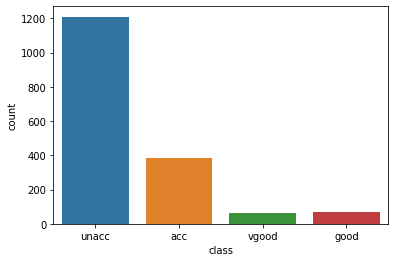

In [12]:
sns.countplot(data['class'])

In [13]:
from sklearn.model_selection import train_test_split

x = data[['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety']]
y = data['class']

In [14]:
x.head()

,buying,maint,doors,persons,lug_boot,safety
0,vhigh,vhigh,2,2,small,low
1,vhigh,vhigh,2,2,small,med
2,vhigh,vhigh,2,2,small,high
3,vhigh,vhigh,2,2,med,low
4,vhigh,vhigh,2,2,med,med


In [15]:
y

0       unacc
1       unacc
2       unacc
3       unacc
4       unacc
        ...  
1723     good
1724    vgood
1725    unacc
1726     good
1727    vgood
Name: class, Length: 1728, dtype: object

##Declare Dataset

In [16]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)

In [17]:
x_train.shape, x_test.shape

((1296, 6), (432, 6))

Encoder Data

In [19]:
pip install --upgrade category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 72 kB 769 kB/s 


In [20]:
import category_encoders as ce

encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])
x_train = encoder.fit_transform(x_train)
x_test = encoder.transform(x_test)

In [21]:
x_train.head()

,buying,maint,doors,persons,lug_boot,safety
1036,1,1,1,1,1,1
757,2,2,2,2,1,1
589,2,1,3,3,2,1
907,1,3,3,1,3,1
1159,1,4,1,3,3,1


In [22]:
# from imblearn.over_sampling import SMOTE

# sm = SMOTE(random_state=2)
# x_train, y_train = sm.fit_resample(x_train, y_train)

In [23]:
# x_train.shape

In [24]:
# a = 3664
# b = 4
# a/b

In [25]:
# sns.countplot(y_train)

In [26]:
from sklearn.tree import DecisionTreeClassifier
for max_d in range(1,10):
  model = DecisionTreeClassifier(max_depth=max_d, random_state=42)
  model.fit(x_train, y_train)
  print('Hasil Training model untuk max_depth {} adalah :'.format(max_d), model.score(x_train,y_train))
  print('Hasil Testing model untuk max_depth {} adalah :'.format(max_d), model.score(x_test,y_test))
  print('')

Hasil Training model untuk max_depth 1 adalah : 0.7067901234567902
Hasil Testing model untuk max_depth 1 adalah : 0.6805555555555556

Hasil Training model untuk max_depth 2 adalah : 0.7445987654320988
Hasil Testing model untuk max_depth 2 adalah : 0.7476851851851852

Hasil Training model untuk max_depth 3 adalah : 0.7862654320987654
Hasil Testing model untuk max_depth 3 adalah : 0.8078703703703703

Hasil Training model untuk max_depth 4 adalah : 0.8109567901234568
Hasil Testing model untuk max_depth 4 adalah : 0.8287037037037037

Hasil Training model untuk max_depth 5 adalah : 0.8240740740740741
Hasil Testing model untuk max_depth 5 adalah : 0.8055555555555556

Hasil Training model untuk max_depth 6 adalah : 0.8595679012345679
Hasil Testing model untuk max_depth 6 adalah : 0.8402777777777778

Hasil Training model untuk max_depth 7 adalah : 0.8850308641975309
Hasil Testing model untuk max_depth 7 adalah : 0.8541666666666666

Hasil Training model untuk max_depth 8 adalah : 0.917438271604

In [27]:
from sklearn.tree import DecisionTreeClassifier

modelGini = DecisionTreeClassifier(criterion='gini', max_depth=6, random_state=0)
modelGini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=6, random_state=0)

In [28]:
y_pred_gini = modelGini.predict(x_test)

In [29]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred_gini)
print(cm)
accuracy_score(y_test, y_pred_gini)

[[ 82   4  14   3]
 [ 11   2   2   0]
 [ 18   0 276   0]
 [ 17   0   0   3]]


0.8402777777777778

In [30]:
print('Training set score: {:.4f}'.format(modelGini.score(x_train, y_train)))
print('Test set score: {:.4f}'.format(modelGini.score(x_test, y_test)))

Training set score: 0.8596
Test set score: 0.8403


In [31]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_gini))

              precision    recall  f1-score   support

         acc       0.64      0.80      0.71       103
        good       0.33      0.13      0.19        15
       unacc       0.95      0.94      0.94       294
       vgood       0.50      0.15      0.23        20

    accuracy                           0.84       432
   macro avg       0.60      0.50      0.52       432
weighted avg       0.83      0.84      0.83       432



## Predict

In [32]:
newdata = modelGini.predict(np.array([[1,2,3,2,3,1]]))
newdata

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['unacc'], dtype=object)

In [33]:
newdata = modelGini.predict(np.array([[1,3,4,1,3,1]]))
newdata

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['acc'], dtype=object)